In [1]:
#libraries

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import random
import pandas as pd 


from sklearn.datasets import load_files
from keras.preprocessing.image import array_to_img, img_to_array, load_img
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
#data loading
DATADIR = "../dataset/fruits-360/Training"
DATADIR_test = "../dataset/fruits-360/Test"

TYPES = ["Apple", "Banana", "Plum", "Pepper", "Cherry", "Grape", "Tomato", "Potato", "Pear", "Peach"]
fruits = {}
def load_dataset(dire):
    fruits = {}
    images_as_array = []
    labels =[]
    for category in tqdm(os.listdir(dire)):
        for typ in TYPES:
            if(category.split()[0] == typ):
               # print(category, typ)
                fruits[category]= typ
                path = os.path.join(dire,category)
                class_num =TYPES.index(fruits[category])

                class_name = fruits[category]
                for img in tqdm(os.listdir(path)):
                   # print("OK: ",os.path.join(path,img) )
                    file = os.path.join(path,img)
                    #print(file, " -- ", dataset)
                    images_as_array.append(img_to_array(load_img(file,target_size=(32, 32))))
                    labels.append(class_num)
    images_as_array =  np.array(images_as_array)
    labels = np.array(labels)
    return images_as_array, labels

In [3]:
#split in test and training sets
train = load_dataset(DATADIR)
test = load_dataset(DATADIR_test)

 87%|████████▋ | 417/480 [00:05<00:01, 53.32it/s]


 91%|█████████ | 446/492 [00:05<00:00, 88.63it/s]


 43%|████▎     | 183/429 [00:02<00:02, 92.37it/s]


 70%|██████▉   | 468/672 [00:05<00:03, 66.69it/s]


  8%|▊         | 38/490 [00:00<00:08, 51.38it/s]


 81%|████████  | 596/738 [00:06<00:01, 85.60it/s]


 27%|██▋       | 131/492 [00:01<00:06, 57.17it/s]


 37%|███▋      | 367/984 [00:10<00:21, 28.59it/s]


 78%|███████▊  | 383/490 [00:04<00:01, 90.21it/s]


 38%|███▊      | 45/120 [03:15<07:36,  6.08s/it]


 92%|█████████▏| 451/492 [00:04<00:00, 114.59it/s]


 74%|███████▍  | 519/702 [00:06<00:02, 88.64it/s]


  5%|▌         | 25/490 [00:00<00:07, 65.29it/s]


 32%|███▏      | 212/666 [00:01<00:04, 107.78it/s]


 51%|█████▏    | 462/900 [00:04<00:04, 91.55it/s]


 62%|██████▏   | 279/450 [00:02<00:01, 94.52it/s]


 10%|▉         | 67/672 [00:00<00:05, 101.31it/s]


 99%|█████████▊| 728/738 [00:11<00:00, 56.71it/s]


 56%|█████▋    | 259/459 [00:02<00:01, 102.87it/s]


  2%|▏         | 4/164 [00:00<00:05, 29.50it/s]


 48%|████▊     | 106/219 [00:00<00:01, 102.72it/s]


 59%|█████▉    | 97/164 [00:00<00:00, 104.53it/s]


 69%|██████▊   | 169/246 [00:01<00:00, 107.04it/s]


 82%|████████▏ | 122/148 [00:01<00:00, 108.76it/s]


 83%|████████▎ | 124/150 [00:01<00:00, 112.68it/s]


100%|██████████| 120/120 [01:59<00:00,  1.00it/s]


In [4]:
x_train, y_train= train

In [5]:
x_test, y_test = test

In [6]:
#train and test shape
print('Train shape:')
print('X: ',x_train.shape)
print('y: ',y_train.shape)

print('Test shape')
print('X: ',x_test.shape)
print('y: ',y_test.shape)

Train shape:
X:  (29340, 32, 32, 3)
y:  (29340,)
Test shape
X:  (9817, 32, 32, 3)
y:  (9817,)


In [7]:
#pre-processing
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

no_of_classes = len(np.unique(y_train))
y_train = np_utils.to_categorical(y_train,no_of_classes)
y_test = np_utils.to_categorical(y_test,no_of_classes)

In [8]:
print(y_train[0:10])
print("Number of classes: ",no_of_classes)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Number of classes:  10


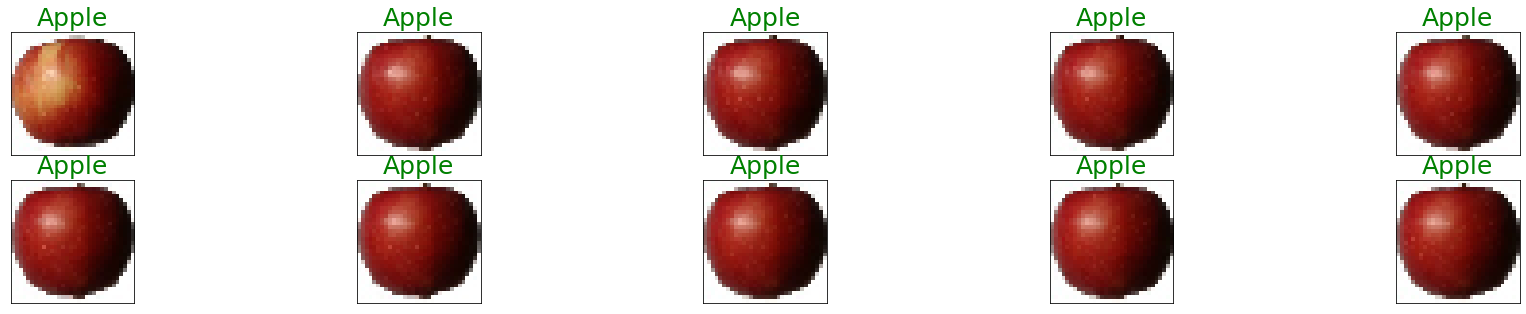

In [9]:
#visualization of the dirst 10 images
import matplotlib.pyplot as plt

fig = plt.figure(figsize =(30,5))
for i in range(10):
    ax = fig.add_subplot(2,5,i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(x_train[i]))
    ax.set_title("{}".format(TYPES[np.argmax(y_train[i])]),color=("green"),fontdict= {'fontsize': '25'})

In [10]:
#shuffle the data

from sklearn.utils import shuffle
import numpy as np
x_train,y_train = shuffle(x_train, y_train)
x_test,y_test = shuffle(x_test, y_test)

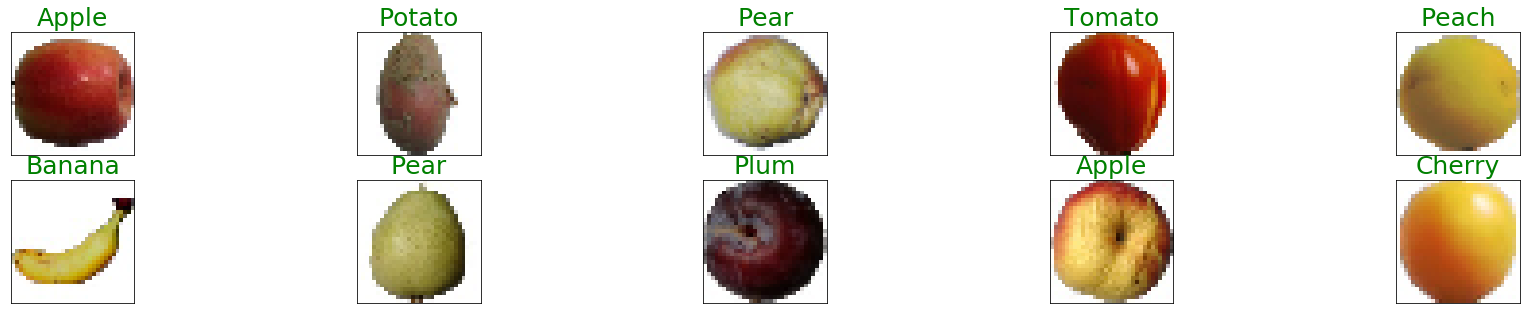

In [11]:
#visualisation of the first 10 images shuffled
import matplotlib.pyplot as plt

fig = plt.figure(figsize =(30,5))
for i in range(10):
    ax = fig.add_subplot(2,5,i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(x_train[i]))
    ax.set_title("{}".format(TYPES[np.argmax(y_train[i])]),color=("green"),fontdict= {'fontsize': '25'})

In [12]:
#split in validation and test set
# Using 80-20 rule
split = len(x_test)*80//100

print('Test len before split: ',len(x_test))
print('Validation split len:', split)

Test len before split:  9817
Validation split len: 7853


In [13]:
# Now, we have to divide the validation set into test and validation set
x_test,x_valid = x_test[split:],x_test[:split]
y_test,y_vaild = y_test[split:],y_test[:split]
print('Train X : ',x_train.shape)
print('Train y :',y_train.shape)

print('1st training image shape ',x_train[0].shape)

print('Vaildation X : ',x_valid.shape)
print('Vaildation y :',y_vaild.shape)
print('Test X : ',x_test.shape)
print('Test y : ',y_test.shape)

Train X :  (29340, 32, 32, 3)
Train y : (29340, 10)
1st training image shape  (32, 32, 3)
Vaildation X :  (7853, 32, 32, 3)
Vaildation y : (7853, 10)
Test X :  (1964, 32, 32, 3)
Test y :  (1964, 10)


In [14]:
#LeNet model
input_shape = (32,32,3)
num_classes = 10
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=input_shape, padding="same"),
    tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),
    tf.keras.layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'),
    tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation = 'tanh'),
    tf.keras.layers.Dense(84, activation = 'tanh'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

net_name = "LeNet"

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 6)         456       
_________________________________________________________________
average_pooling2d (AveragePo (None, 16, 16, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 6, 6, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               69240     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [24]:
history = model.fit(x_train, y_train,
                    batch_size = 32,
                    epochs = 10,
                    validation_data=(x_valid, y_vaild),
                    verbose = 2
                  )

Train on 29340 samples, validate on 7853 samples
Epoch 1/10
29340/29340 - 31s - loss: 2.2505e-05 - accuracy: 1.0000 - val_loss: 0.0820 - val_accuracy: 0.9823
Epoch 2/10
29340/29340 - 30s - loss: 1.3864e-05 - accuracy: 1.0000 - val_loss: 0.0889 - val_accuracy: 0.9827
Epoch 3/10
29340/29340 - 28s - loss: 8.5268e-06 - accuracy: 1.0000 - val_loss: 0.0876 - val_accuracy: 0.9834
Epoch 4/10
29340/29340 - 28s - loss: 5.2328e-06 - accuracy: 1.0000 - val_loss: 0.0857 - val_accuracy: 0.9838
Epoch 5/10
29340/29340 - 26s - loss: 3.2125e-06 - accuracy: 1.0000 - val_loss: 0.0876 - val_accuracy: 0.9842
Epoch 6/10
29340/29340 - 26s - loss: 1.9707e-06 - accuracy: 1.0000 - val_loss: 0.0933 - val_accuracy: 0.9845
Epoch 7/10
29340/29340 - 26s - loss: 1.2112e-06 - accuracy: 1.0000 - val_loss: 0.0966 - val_accuracy: 0.9841
Epoch 8/10
29340/29340 - 26s - loss: 7.5332e-07 - accuracy: 1.0000 - val_loss: 0.0950 - val_accuracy: 0.9859
Epoch 9/10
29340/29340 - 26s - loss: 4.6071e-07 - accuracy: 1.0000 - val_loss: 

In [25]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.98625255


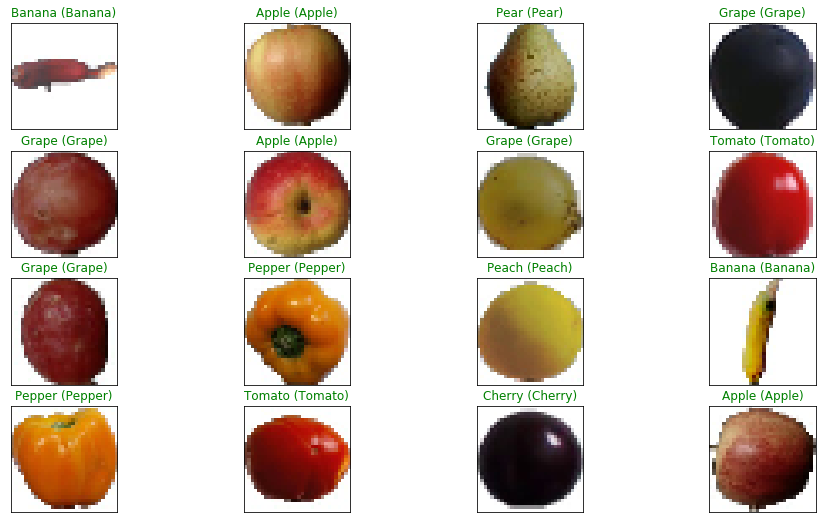

In [26]:
y_pred = model.predict(x_test)

# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(TYPES[pred_idx], TYPES[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

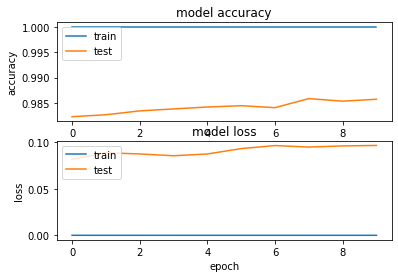

In [27]:
#plotting images

import matplotlib.pyplot as plt 
plt.figure(1)  
   
 # summarize history for accuracy  
   
plt.subplot(211)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
 # summarize history for loss  
   
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()